In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv('drugsComTrain_raw.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
uniqueID       161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null int64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [4]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
df.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


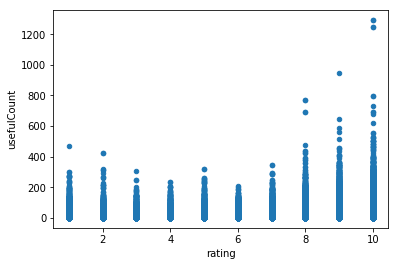

In [6]:
#find a correlation among the rating and useful count
df.plot.scatter(x='rating',y='usefulCount')

In [7]:
#get the top 15 reviews in the list based on usefulness count
df.nlargest(15,'usefulCount')

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
146145,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949
16889,52305,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
58608,139141,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
2039,62757,Citalopram,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
152838,89825,Celexa,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
5218,107655,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,19-Jul-10,730


In [8]:
#see the most used drugs to treat conditions
df['drugName'].value_counts()

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Citalopram                             995
Medroxyprogesterone                    995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Metronidazole                          922
Contrave                               920
Drospirenone / ethinyl estradiol       890
Depo-Prover

In [9]:
#find the most common conditions that are treated
df['condition'].value_counts().nlargest(15)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Name: condition, dtype: int64

In [10]:
# checking out the test data
# commonCdf2 = df2['condition'].value_counts().nlargest(15)
# commonConditions = pd.DataFrame(commonCdf2)
# commonConditions

In [11]:
#establish a dataframe to focus on birth control
birth_control_df = df[df.condition == 'Birth Control']

In [12]:
birth_control_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28788 entries, 2 to 161291
Data columns (total 7 columns):
uniqueID       28788 non-null int64
drugName       28788 non-null object
condition      28788 non-null object
review         28788 non-null object
rating         28788 non-null int64
date           28788 non-null object
usefulCount    28788 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.8+ MB


In [13]:
#locate each instance of birth control use in our dataframe
birth_control_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,11-Aug-14,11


In [14]:
#get the number of times each drug was used for birth control
birth_control_df['drugName'].value_counts().nlargest(15)

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
Ethinyl estradiol / norgestimate      1580
Implanon                              1095
Mirena                                 965
Skyla                                  822
Lo Loestrin Fe                         667
Ethinyl estradiol / etonogestrel       631
NuvaRing                               620
Copper                                 607
Drospirenone / ethinyl estradiol       522
Medroxyprogesterone                    502
Name: drugName, dtype: int64

In [15]:
#dataframe to show the average satifcation of using Etonogestrel for birth control(top choice of drug)
etonogestrelBCDf = birth_control_df[birth_control_df.drugName == 'Etonogestrel']
etonogestrelBCDf['rating'].mean()

5.808992154496077

In [16]:
#find the top occurences of the drugs
df['drugName'].value_counts().nlargest(15)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Name: drugName, dtype: int64

In [17]:
def condition_func(condition, df):
    if(type(condition) != str):
        raise ValueError("The input should be a string")
        
    condition_df = df.loc[df['condition'] == condition]
    print(condition_df['drugName'].value_counts().nlargest(15))
    
condition_func('Birth Control', df)

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
Ethinyl estradiol / norgestimate      1580
Implanon                              1095
Mirena                                 965
Skyla                                  822
Lo Loestrin Fe                         667
Ethinyl estradiol / etonogestrel       631
NuvaRing                               620
Copper                                 607
Drospirenone / ethinyl estradiol       522
Medroxyprogesterone                    502
Name: drugName, dtype: int64


In [18]:
#Looop through the drug names
for drug_name in df.drugName.unique():
    print(drug_name)

Valsartan
Guanfacine
Lybrel
Ortho Evra
Buprenorphine / naloxone
Cialis
Levonorgestrel
Aripiprazole
Keppra
Ethinyl estradiol / levonorgestrel
Topiramate
L-methylfolate
Pentasa
Dextromethorphan
Nexplanon
Liraglutide
Trimethoprim
Amitriptyline
Lamotrigine
Nilotinib
Atripla
Trazodone
Etonogestrel
Etanercept
Tioconazole
Azithromycin
Eflornithine
Daytrana
Ativan
Imitrex
Sertraline
Toradol
Viberzi
Mobic
Dulcolax
Morphine
MoviPrep
Trilafon
Fluconazole
Contrave
Clonazepam
Metaxalone
Venlafaxine
Ledipasvir / sofosbuvir
Symbyax
Tamsulosin
Doxycycline
Dulaglutide
Intuniv
Buprenorphine
Qvar
Opdivo
Pyridium
Latuda
Bupropion
Implanon
Effexor XR
Drospirenone / ethinyl estradiol
NuvaRing
Prepopik
Tretinoin
Gildess Fe 1 / 20
Ethinyl estradiol / norgestimate
Elbasvir / grazoprevir
Clomiphene
Docusate / senna
Amitiza
Sildenafil
Lo Loestrin Fe
Oxcarbazepine
Wellbutrin
Phillips' Milk of Magnesia
Nature-Throid
Lithium
Oxycodone
Estradiol
Sronyx
Augmentin XR
Monistat 7-Day Combination Pack
Plan B One-Step
Alp

Tysabri
Lactobacillus acidophilus
Oxaliplatin
Mexiletine
Halcion
Somatropin
Enjuvia
Multivitamin, prenatal
Omnicef
Embeda
Triamcinolone
Uloric
Caffeine
Arthrotec
Sodium hyaluronate
Zarah
Benicar HCT
Hydrochlorothiazide / spironolactone
Sumavel DosePro
Immune globulin subcutaneous
Certolizumab
Aftera
Pemoline
Delsym
Capzasin-HP
Topicort
Carvedilol
Actiq
Phendimetrazine
Mysoline
Acamprosate
Prevnar 13
Doxazosin
Vistaril
Rapaflo
Vitamin B2
Acthar
Memantine
Heather
Apixaban
Patanase
Januvia
Nicotine
S-adenosylmethionine
Zetia
Feldene
Pradaxa
Abacavir / dolutegravir / lamivudine
Synvisc
Dextromethorphan / quinidine
Acetaminophen / tramadol
Tazarotene
Opcon-A
Ketoprofen
Golimumab
Kava
Loestrin Fe 1.5 / 30
Letairis
Coartem
Complera
ProAir HFA
Nasacort
Pramoxine
Clindesse
Cozaar
Multivitamin
Chlorpromazine
Protopic
Migranal
Teriparatide
Dihydroergotamine
Potassium chloride
Chateal
Quasense
Anafranil
Advair Diskus
Nefazodone
Ditropan
Taytulla
Kenalog
Tenormin
Rebif
Copaxone
Generess Fe
Hydroxyu

Amoxapine
Glyburide
Vicodin HP
Vienva
Estazolam
Benazepril
Cordran Tape
Durezol
Keytruda
Acetaminophen / dextromethorphan / doxylamine / pseudoephedrine
Gemifloxacin
Myobloc
Omnaris
Mycophenolic acid
Cytomel
Tetracycline
EpiPen
Allegra-D 12 Hour
Risperdal M-Tab
Hylira
Solaraze
Sanctura XR
Myleran
Lidex
Chlorpheniramine / methscopolamine / phenylephrine
Inderal LA
Ergocalciferol
HyoMax SR
Lucentis
Phenylephrine / pramoxine
Dexamethasone / neomycin / polymyxin b
Repaglinide
Kenalog-40
Insulin inhalation, rapid acting
Lopressor
Zelboraf
Urso
Zometa
Esterified estrogens
Phenobarbital
Pioglitazone
Ryzolt
Lo / Ovral
Stivarga
Claritin-D
Budeprion XL
Advate
Belimumab
Iclusig
Everolimus
Stromectol
Rufinamide
Yohimbine
Revlimid
Diamox Sequels
Fexmid
Mephyton
Pulmicort Flexhaler
Azo-Standard
Degarelix
Epoetin alfa
Indocin SR
Symmetrel
Boceprevir
Equetro
Corn Huskers Lotion
Cetirizine / pseudoephedrine
Capsin
Phytonadione
Lactase
Ovide
Dextromethorphan / guaifenesin
Retin A Micro
Riboflavin
Cyclop

Robitussin Cold Cough and Flu
Arnuity Ellipta
Phentride
Artemether / lumefantrine
Rolapitant
Calamine
Gemcitabine
Azo Urinary Pain Relief
Tolnaftate
Ganciclovir
Tarka
Lesinurad
Fleet Bisacodyl
Exforge HCT
Zafirlukast
Filgrastim
Salicylic acid
Bendroflumethiazide / nadolol
Jencycla
Faslodex
Micrainin
Epidrin
Cranberry
Hydrocortone
Bacitracin / polymyxin b
Emtricitabine / rilpivirine / tenofovir alafenamide
Torisel
Saw palmetto
Cardizem CD
Diphenhydramine / phenylephrine
Cesamet
Citric acid / simethicone / sodium bicarbonate
Triple Antibiotic
Lanthanum carbonate
Atrovent HFA
Halog-E
Rhinocort Aqua
Pneumococcal 23-polyvalent vaccine
Dong quai
Glucophage XR
Infumorph
Alprazolam Intensol
Sumadan
Nicotrol NS
Chloramphenicol
Vitapap
Altabax
Azilect
GenTeal
Mumps virus vaccine
Enzalutamide
Phendiet
Cosamin DS
Nesina
Isradipine
Epivir
Indapamide
Dicloxacillin
Toujeo Solostar
Flonase Allergy Relief
Lanolin
Nytol
Demeclocycline
Peri-Colace
Alamast
Adcirca
Uristat
Vancocin
Menest
Mucinex Sinus-Max

In [19]:
pd.DatetimeIndex(start=min(df.date), end=max(df.date), freq='M')

DatetimeIndex(['2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31',
               '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30',
               '2008-12-31', '2009-01-31',
               ...
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31'],
              dtype='datetime64[ns]', length=113, freq='M')

In [20]:
df.index = pd.to_datetime(df.date)
drug_df = pd.DataFrame(index=pd.DatetimeIndex(start=min(df.date), end=max(df.date), freq='M'))

for d_name in df.drugName.value_counts().nlargest(5).index:
    temp = df[df.drugName == d_name]
    drug_df[d_name] = temp.rating.resample('M').mean()

drug_df

,Levonorgestrel,Etonogestrel,Ethinyl estradiol / norethindrone,Nexplanon,Ethinyl estradiol / norgestimate
2008-04-30,10.000000,10.000000,NaN,NaN,10.000000
2008-05-31,10.000000,NaN,NaN,NaN,9.000000
2008-06-30,10.000000,NaN,9.000000,NaN,NaN
2008-07-31,9.666667,8.000000,NaN,NaN,NaN
2008-08-31,9.000000,10.000000,10.000000,NaN,NaN
2008-09-30,NaN,NaN,NaN,NaN,NaN
2008-10-31,9.000000,NaN,9.750000,NaN,NaN
2008-11-30,NaN,NaN,9.250000,NaN,NaN
2008-12-31,NaN,NaN,7.500000,NaN,NaN
2009-01-31,NaN,NaN,8.500000,NaN,9.000000


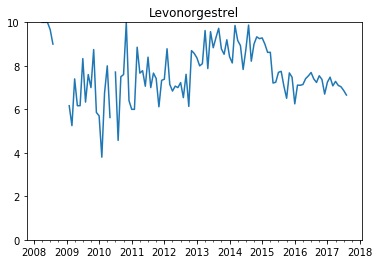

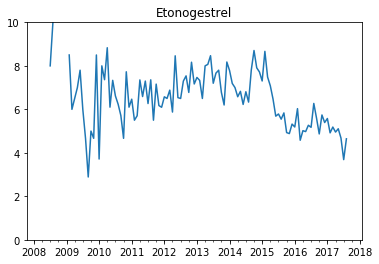

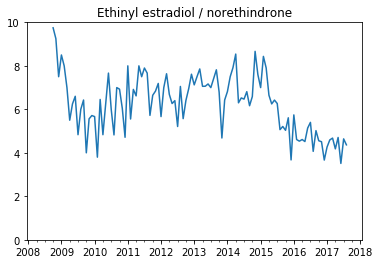

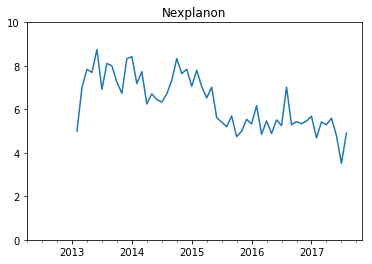

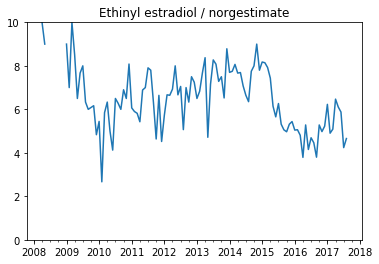

In [21]:
#Make the line graph of them
for c in drug_df.columns:
    drug_df[c].plot(title=c, ylim=(0, 10))
    plt.show()

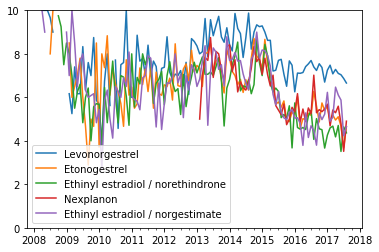

In [22]:
drug_df.plot(ylim=(0,10))
plt.show()

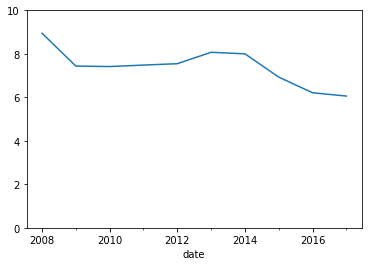

In [23]:
#Make a graph of the mean rating of each year
df.rating.resample('A').mean().plot(ylim=(0,10))
plt.show()

In [24]:
df[df.condition == "Birth Control"].review.nunique()

18133

In [25]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.metrics import confusion_matrix

import pandas, xgboost, numpy, textblob, string

In [26]:
def get_df(df, cond):
    review = df[df.condition == cond].review[:500]
    return pd.DataFrame({'text':review, 'label':cond})

In [27]:
# we only take 500 reviews for each condition so the traning time will decrease

train_df = pd.DataFrame(columns=['text', 'label'])

condition_counts = df.condition.value_counts()

for cond in list(df.condition.unique()):
    if cond in condition_counts and condition_counts[cond] > 100:
        train_df = train_df.append(get_df(df, cond))

train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49938 entries, 2010-04-27 to 2016-06-22
Data columns (total 2 columns):
text     49938 non-null object
label    49938 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [28]:
train_df['text'] = train_df.text.astype(str)
train_df['label'] = train_df.label.astype(str)

In [29]:
train_df.label.value_counts()

Vaginal Yeast Infection                                 500
Schizophrenia                                           500
Osteoarthritis                                          500
Erectile Dysfunction                                    500
Overactive Bladde                                       500
Birth Control                                           500
Muscle Spasm                                            500
Bacterial Infection                                     500
Acne                                                    500
Rheumatoid Arthritis                                    500
Irritable Bowel Syndrome                                500
Panic Disorde                                           500
Restless Legs Syndrome                                  500
Hyperhidrosis                                           500
Opiate Dependence                                       500
Seizures                                                500
Major Depressive Disorde                

In [30]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_df['text'], train_df['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
#The labels for the training set (Study guide answers)
train_y = encoder.fit_transform(train_y)
#The lavels for the testing data set (Exam answers)
valid_y = encoder.fit_transform(valid_y)

In [31]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train_df['text'])

# transform the training and validation data using count vectorizer object
#Every word in everyreview encoded to a number, sotored in an array
#The rows following in the array, put the number of times each word occurs
#Row corresponds to a review
#This is the data we are training on (like a study guide)
xtrain_count =  count_vect.transform(train_x)
#This is the data we are trying to predict (like the test ?s)
xvalid_count =  count_vect.transform(valid_x)

In [32]:
# word level tf-idf
#tfidf is the importance of a word, the more it appears reduces the sway that it has (like abusing power/authority) less is more
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_df['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(train_df['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(train_df['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [33]:

#classifies is ML Algo we are using
#feature_vector_train training portion of the features of the data set (usally X_train)
#label for all of the features(feature_vector_label) (usually y_train)
#feature_vector_valid is the features we are testing our predictions off of (usually X_test)
#We use the 4 of those to train and test
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    #valid y is the answers to our predictions, stored elsewhere
    return metrics.accuracy_score(predictions, valid_y)

In [34]:
# Linear Classifier on Count Vectors
#Testing the predictions using different features

accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)




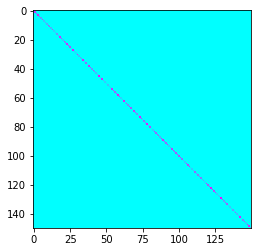

In [50]:
#TODO testing the confusion matrix stuff, going to add to a fucntion
#TODO will call that function in train_model since that's where prediction is 
#TODO test confusion matrix on valid_y, prediction)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#print(valid_y)
#print(xvalid_count) 
#c = confusion_matrix(valid_y, xvalid_count)
cm = confusion_matrix(valid_y, valid_y)
plt.imshow(c, cmap='cool', interpolation='nearest')
plt.show()

In [ ]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)